## Content

1. [User Quafu cloud API](#User-Quafu-cloud-API)
2. [Initiate session](#Initiate-session)
3. [Methods](#Methods)
4. [VQE ansatz](#VQE-ansatz)
5. [Parameterized Quantum Circuit](#Parameterized-Quantum-Circuit)
6. [Case n=3](#Case-n=3)
7. [Case n=6](#Case-n=6)    
8. [Case n=12](#Case-n=12)

### User Quafu cloud API

In [1]:
token_api = 'token_id'

### Initiate session

In [2]:
from quafu import User
user = User(token_api)
user.save_apitoken()

### Methods

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from quafu import Task
from quafu import QuantumCircuit

### VQE ansatz

In [4]:
def pauli_z_ansatz(param, nb_qubits):
    
    x = param
    pqc = QuantumCircuit(nb_qubits)
    pos = [i  for i in range(0, len(x), nb_qubits)]
    s = len(pos)

    for i in range(0, len(pos)):
        
        if i % 2 == 0:
            for j in range(nb_qubits):
                pqc.ry(j, x[pos[i] + j])
        
        if i % 2 != 0:
            
            for j in range(nb_qubits):
                pqc.rz(j, x[pos[i] + j])
            
            if i != s - 1:
                for j in reversed(range(1, nb_qubits)):
                    pqc.cnot(j - 1, j)

    measures = list(range(nb_qubits))
    pqc.measure(measures)

    return pqc

### Parameterized Quantum Circuit

In [5]:
x_3_ng = [3.16390393, 6.58290112, 6.5207641 , 1.81356815, 1.30940265,
       0.32527044, 3.30846516, 1.14994245, 2.9847896 , 5.30056119,
       1.84601714, 5.24764735]

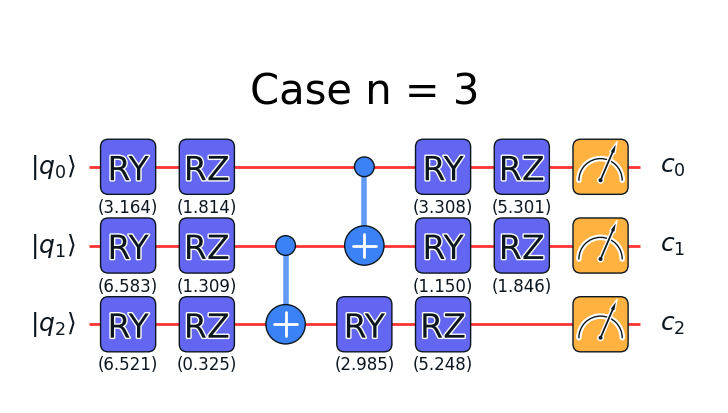

In [6]:
vqe_3_ng = pauli_z_ansatz(x_3_ng, 3)
vqe_3_ng.plot_circuit(title='Case n = 3')

### Case n=3

In [8]:
backend_name = "Dongling"
task = Task()
task.config(backend=f"{backend_name}", shots=1000, compile=True)

In [9]:
job_name = f"vqe_3_ng_{backend_name}"
res_vqe_3_ng = task.send(vqe_3_ng, name=job_name, wait=False)

In [10]:
res_vqe_3_ng = task.retrieve('job_id')

{'011': 547, '001': 279, '010': 75}


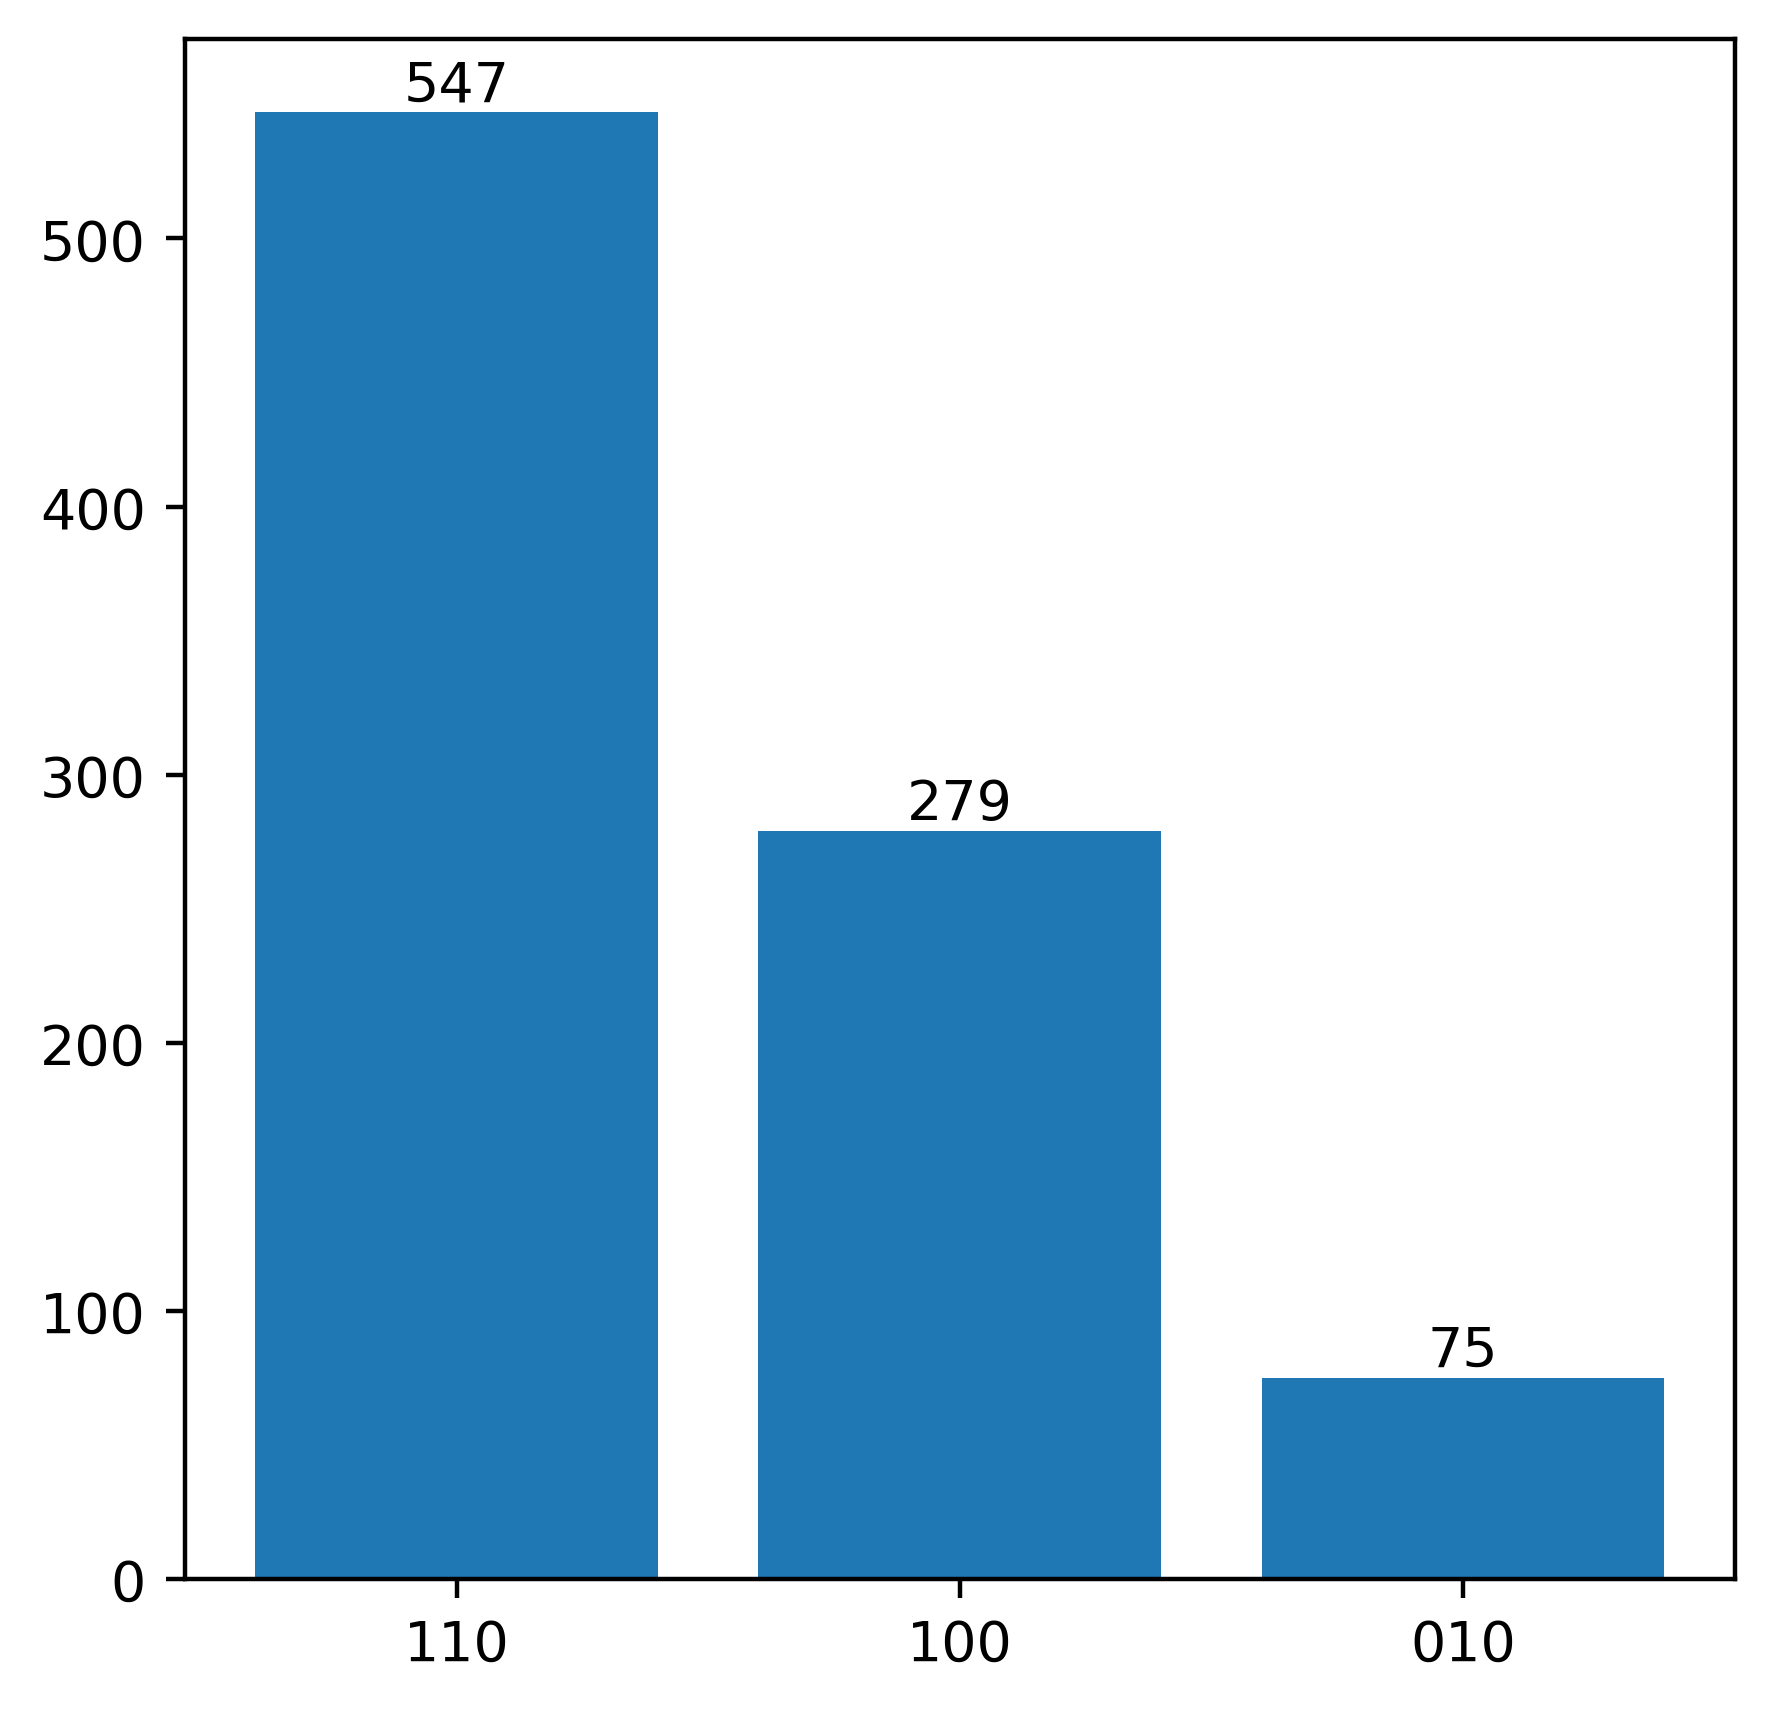

In [11]:
res_dict_3_ng = dict(list(sorted(res_vqe_3_ng.counts.items(), key=lambda item: item[1], reverse=True))[:3])
print(res_dict_3_ng)
plt.figure(figsize=(5,5), dpi=400)
little_endian = [s[::-1] for s in res_dict_3_ng.keys()]
counts = plt.bar(range(len(res_dict_3_ng)), list(res_dict_3_ng.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(res_dict_3_ng)), list(little_endian))
plt.show()


### Case n=6

In [12]:
x_6_ng = [3.37198732, 2.93296513, 3.08370596, 2.87198562, 3.18925302,
       3.25127496, 4.33710786, 4.74084558, 2.72410079, 3.15940499,
       5.45534669, 4.11428381, 3.13484137, 3.07920946, 0.08166367,
       6.32917332, 6.20178288, 6.11507437, 5.97787932, 1.06475315,
       2.5359521 , 0.28904721, 0.39489462, 2.26707295]

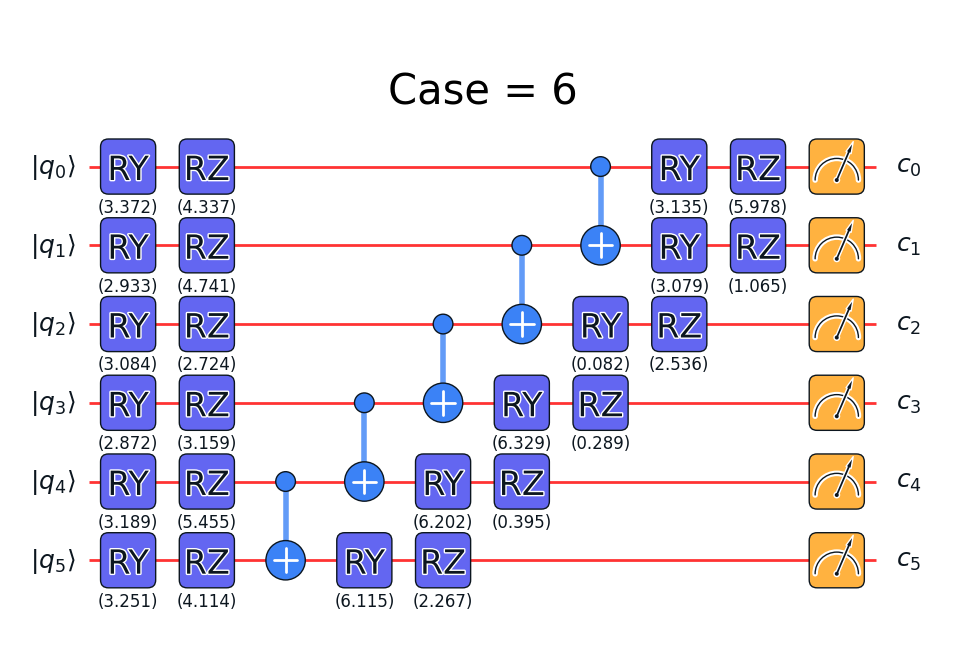

In [13]:
vqe_6_ng = pauli_z_ansatz(x_6_ng, 6)
vqe_6_ng.plot_circuit(title='Case = 6')

In [15]:
backend_name = "Dongling"
task = Task()
task.config(backend=f"{backend_name}", shots=1000, compile=True)

In [16]:
job_name = f"vqe_6_ng_{backend_name}"
res_vqe_6_ng = task.send(vqe_6_ng, name=job_name, wait=False)

In [17]:
res_vqe_6_ng = task.retrieve('job_id')


{'010000': 555, '010001': 77, '100000': 45}


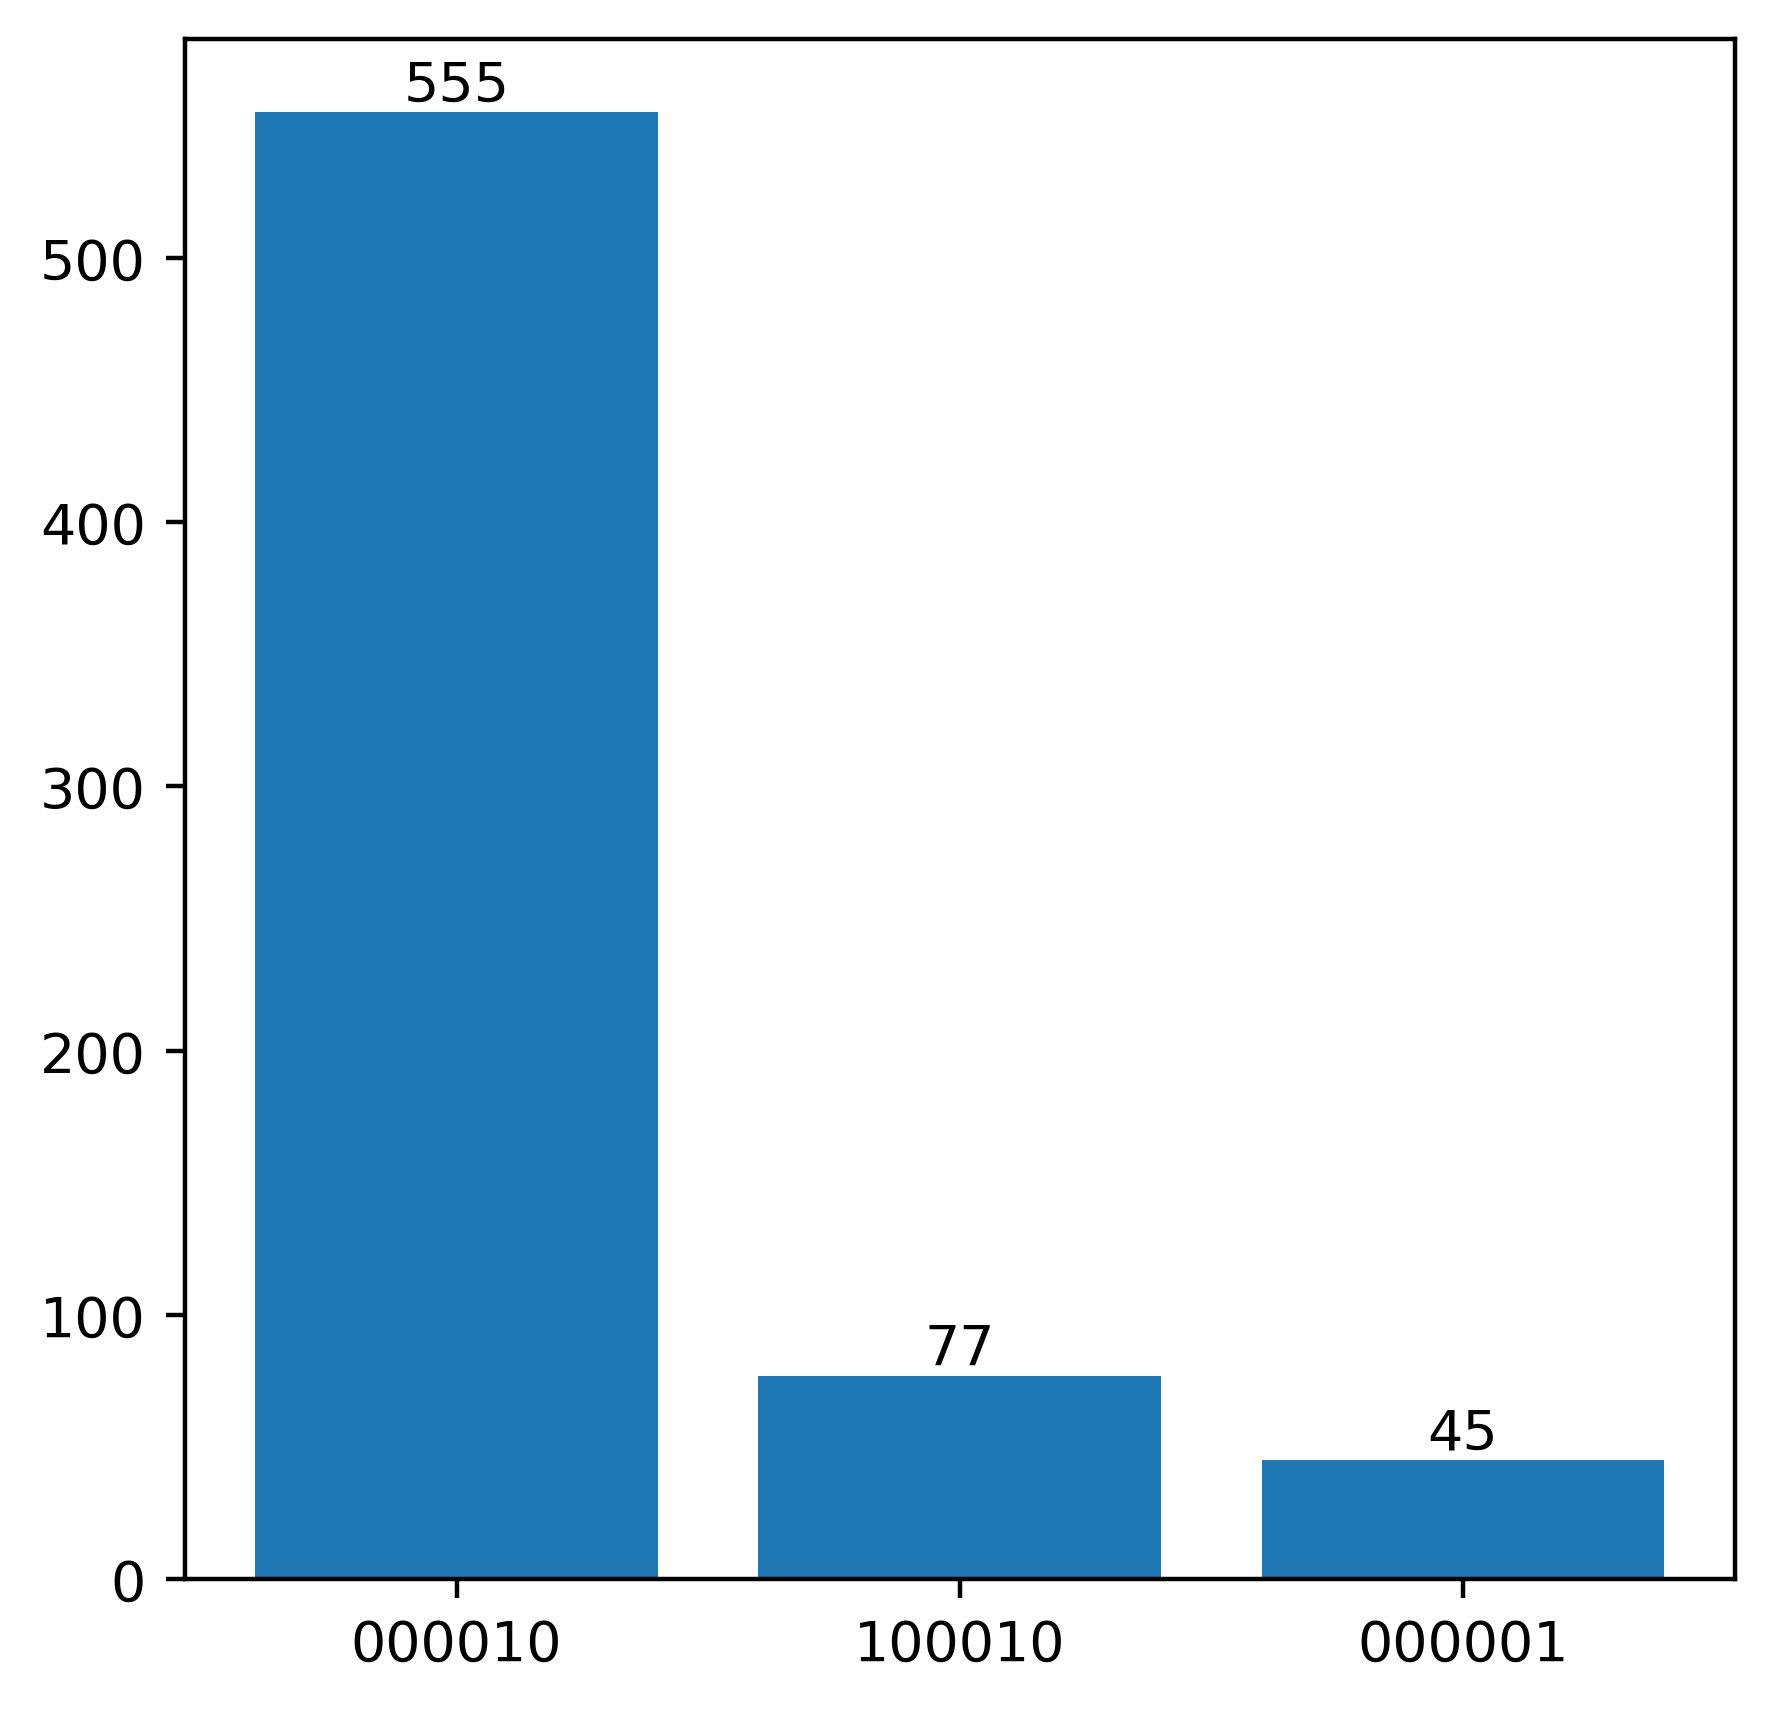

In [18]:
res_dict_6_ng = dict(list(sorted(res_vqe_6_ng.counts.items(), key=lambda item: item[1], reverse=True))[:3])
print(res_dict_6_ng)
plt.figure(figsize=(5,5), dpi=400)
little_endian = [s[::-1] for s in res_dict_6_ng.keys()]
counts = plt.bar(range(len(res_dict_6_ng)), list(res_dict_6_ng.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(res_dict_6_ng)), list(little_endian))
plt.show()

### Case n=12

In [19]:
x_12_ng = [7.00835382e+00,  6.26815822e+00,  6.50172145e+00,  3.35560327e+00,
       -4.45371733e-02,  3.21598284e+00,  6.39441401e+00,  6.33658459e+00,
        3.21216021e+00,  3.16741571e+00,  3.37466272e-03,  6.22287889e+00,
        2.63761592e+00,  6.51825664e+00,  2.97344769e+00,  5.86038540e+00,
        3.74480810e+00,  5.57595817e+00,  7.67435384e-02,  2.40222941e+00,
        7.60322804e-01,  3.09352310e+00,  4.37746162e+00,  3.83769966e+00,
        3.67315873e+00,  5.52253064e+00,  6.05437397e-02,  3.43231470e+00,
        4.03771659e+00,  3.19756439e+00,  3.08342582e+00,  6.20464456e+00,
        2.51533805e+00,  6.22806310e+00,  3.20641100e+00, -1.72130100e-02,
        3.96923744e+00,  1.25362362e+00,  4.38415574e+00,  4.17355189e+00,
        5.96536601e+00,  4.45868216e+00,  2.30501122e+00,  4.22990815e-01,
        1.64071462e+00, -4.52436297e-01,  3.46509817e+00, -1.12453753e-01]


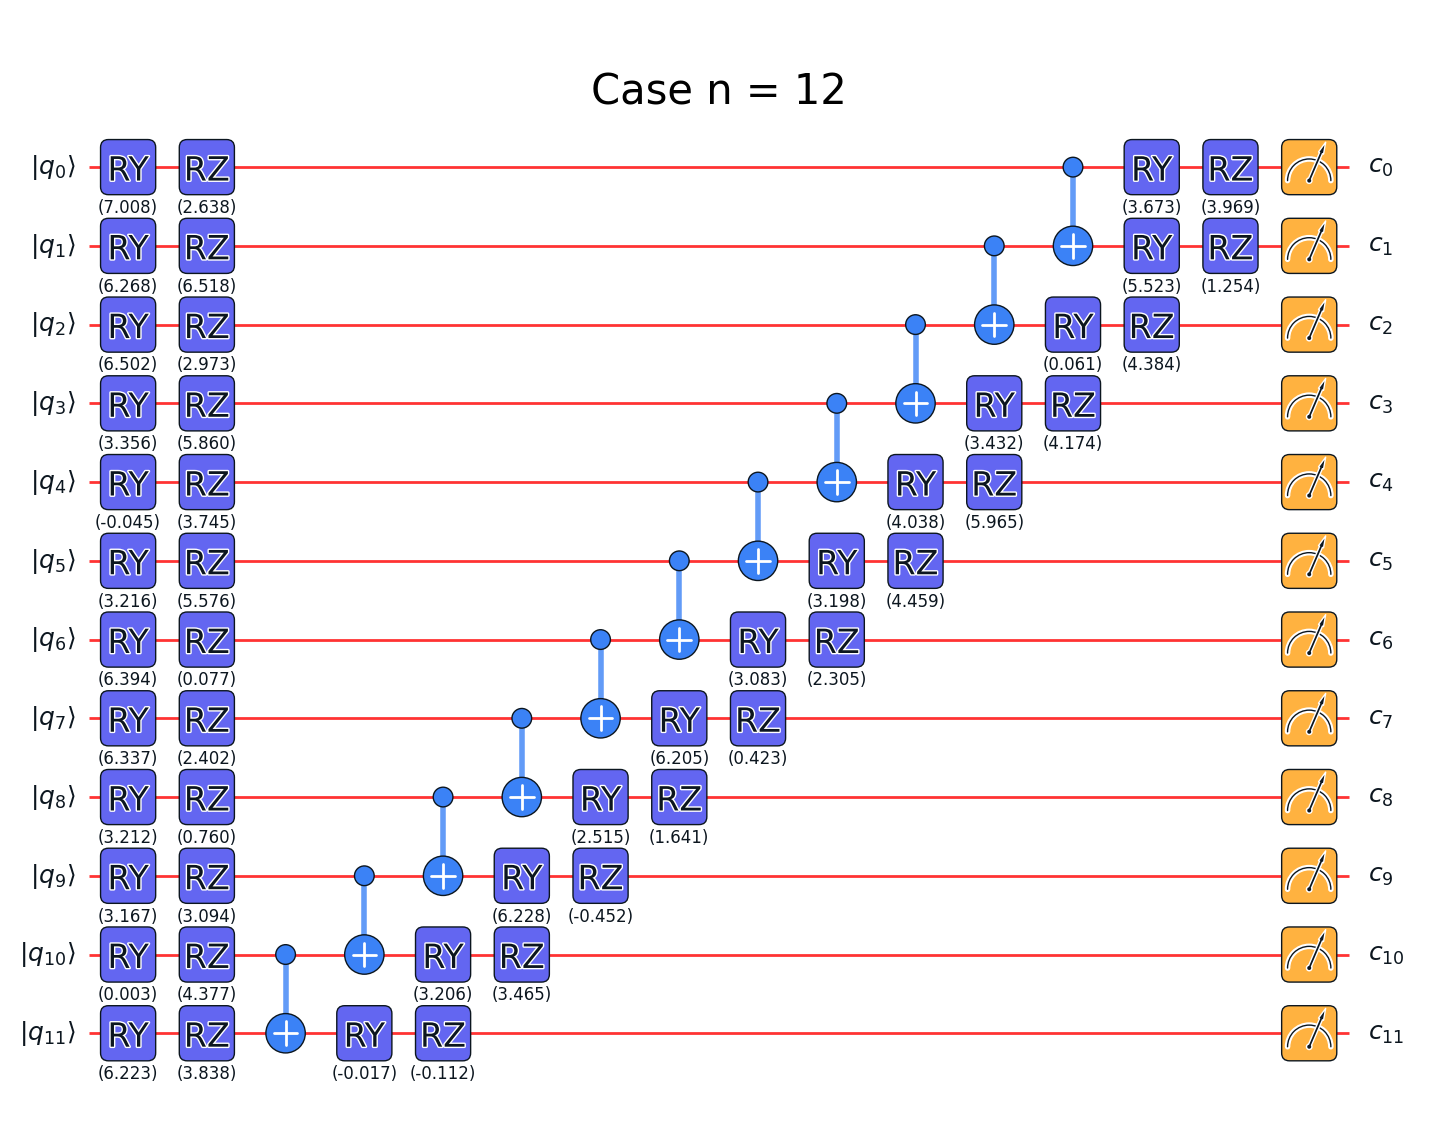

In [20]:
vqe_12_ng = pauli_z_ansatz(x_12_ng, 12)
vqe_12_ng.plot_circuit(title='Case n = 12')

In [22]:
backend_name = "Dongling"
task = Task()
task.config(backend=f"{backend_name}", shots=1000, compile=True)

In [23]:
job_name = f"vqe_12_ng_{backend_name}"
res_vqe_12_ng = task.send(vqe_12_ng, name=job_name, wait=True)

In [24]:
res_vqe_12_ng = task.retrieve('job_id')

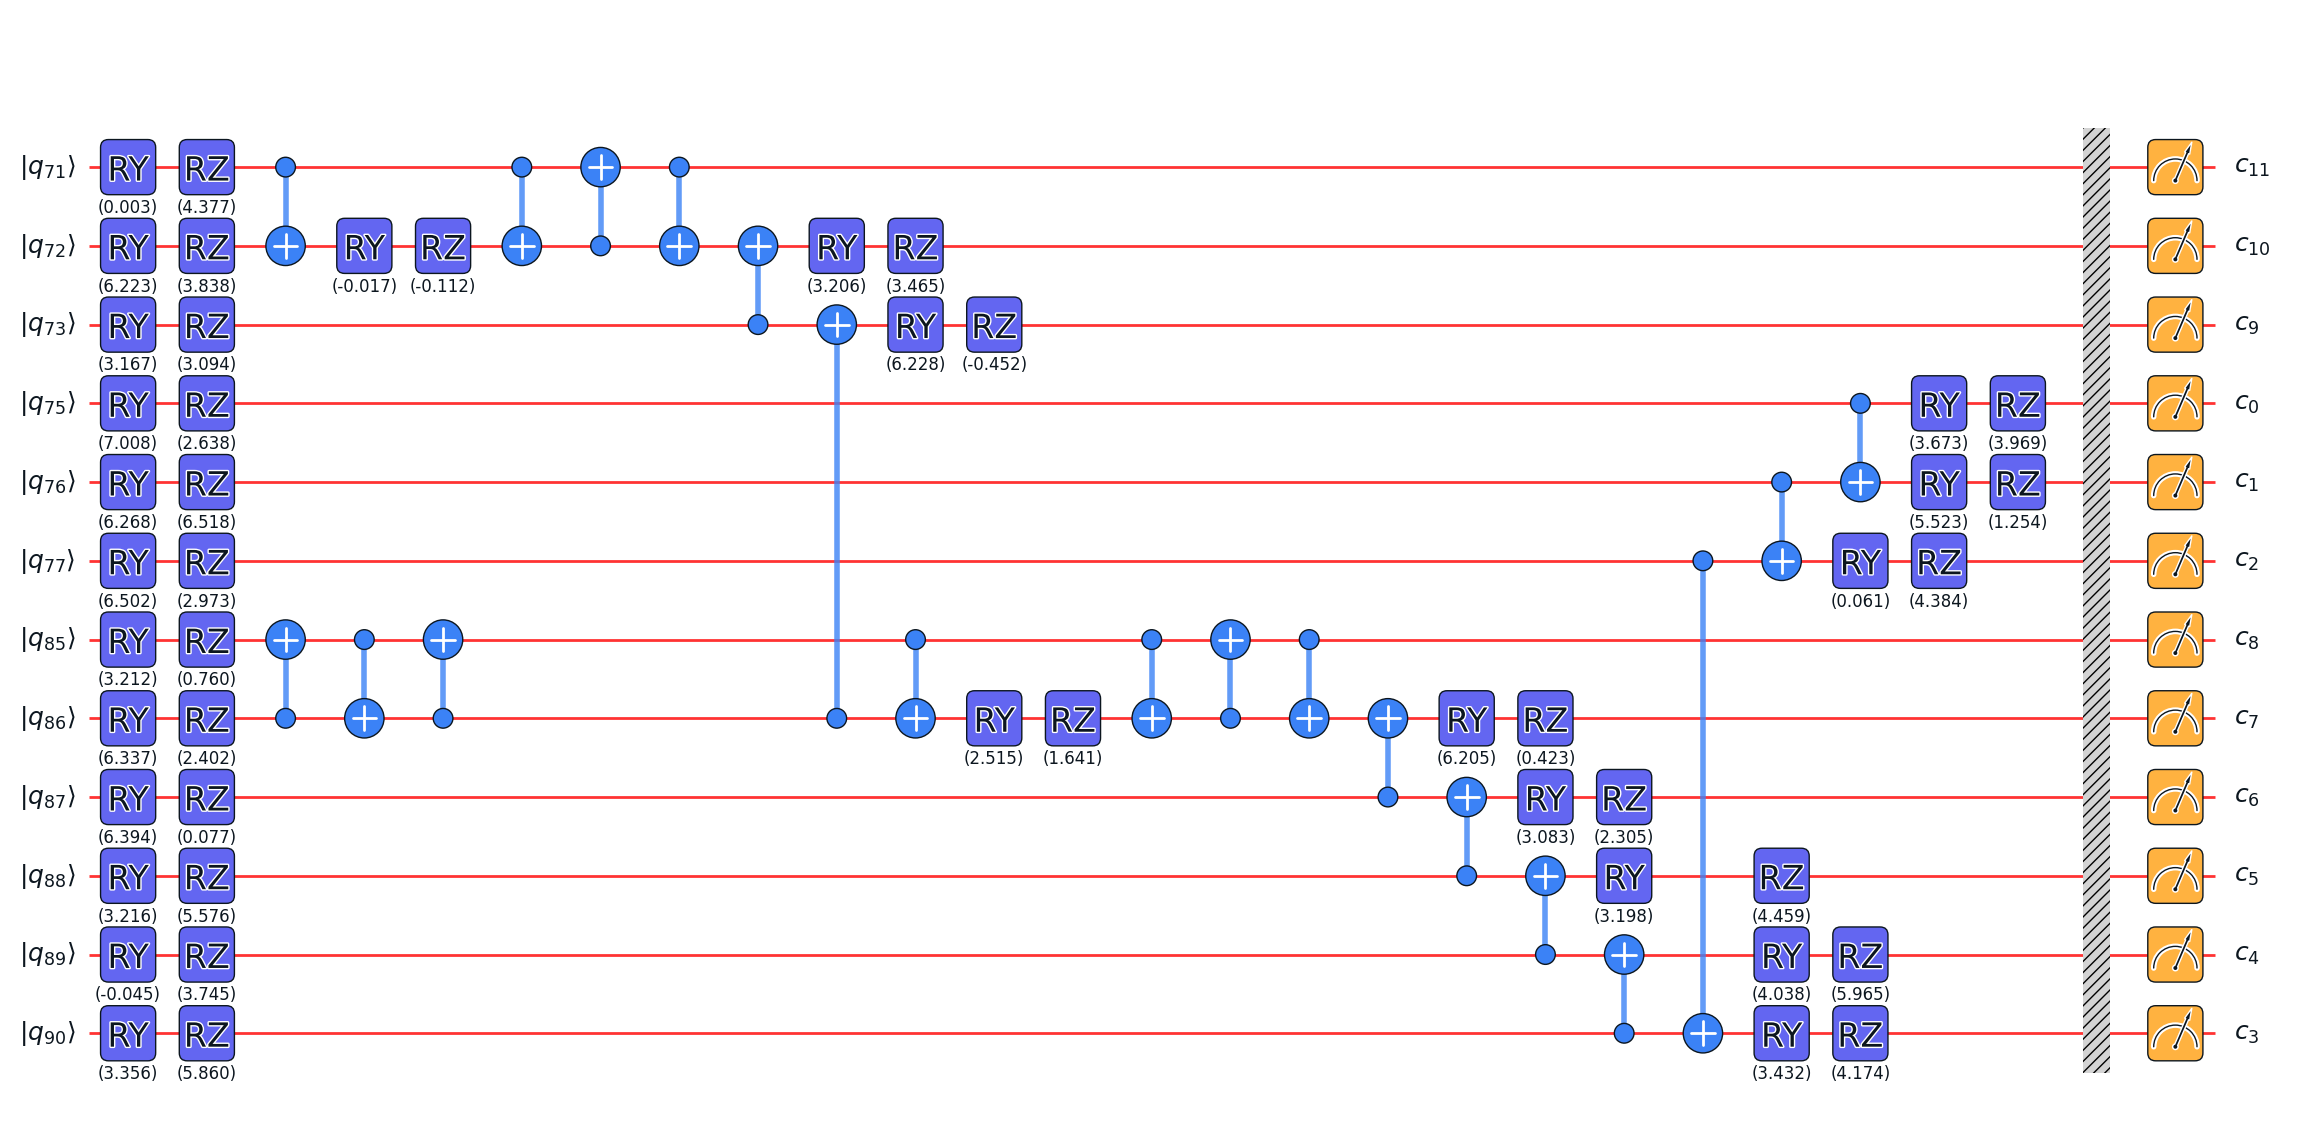

In [25]:
res_vqe_12_ng.transpiled_circuit.plot_circuit(figsize=(8,8))

{'100001100000': 30, '100000100000': 28, '100000000000': 18}


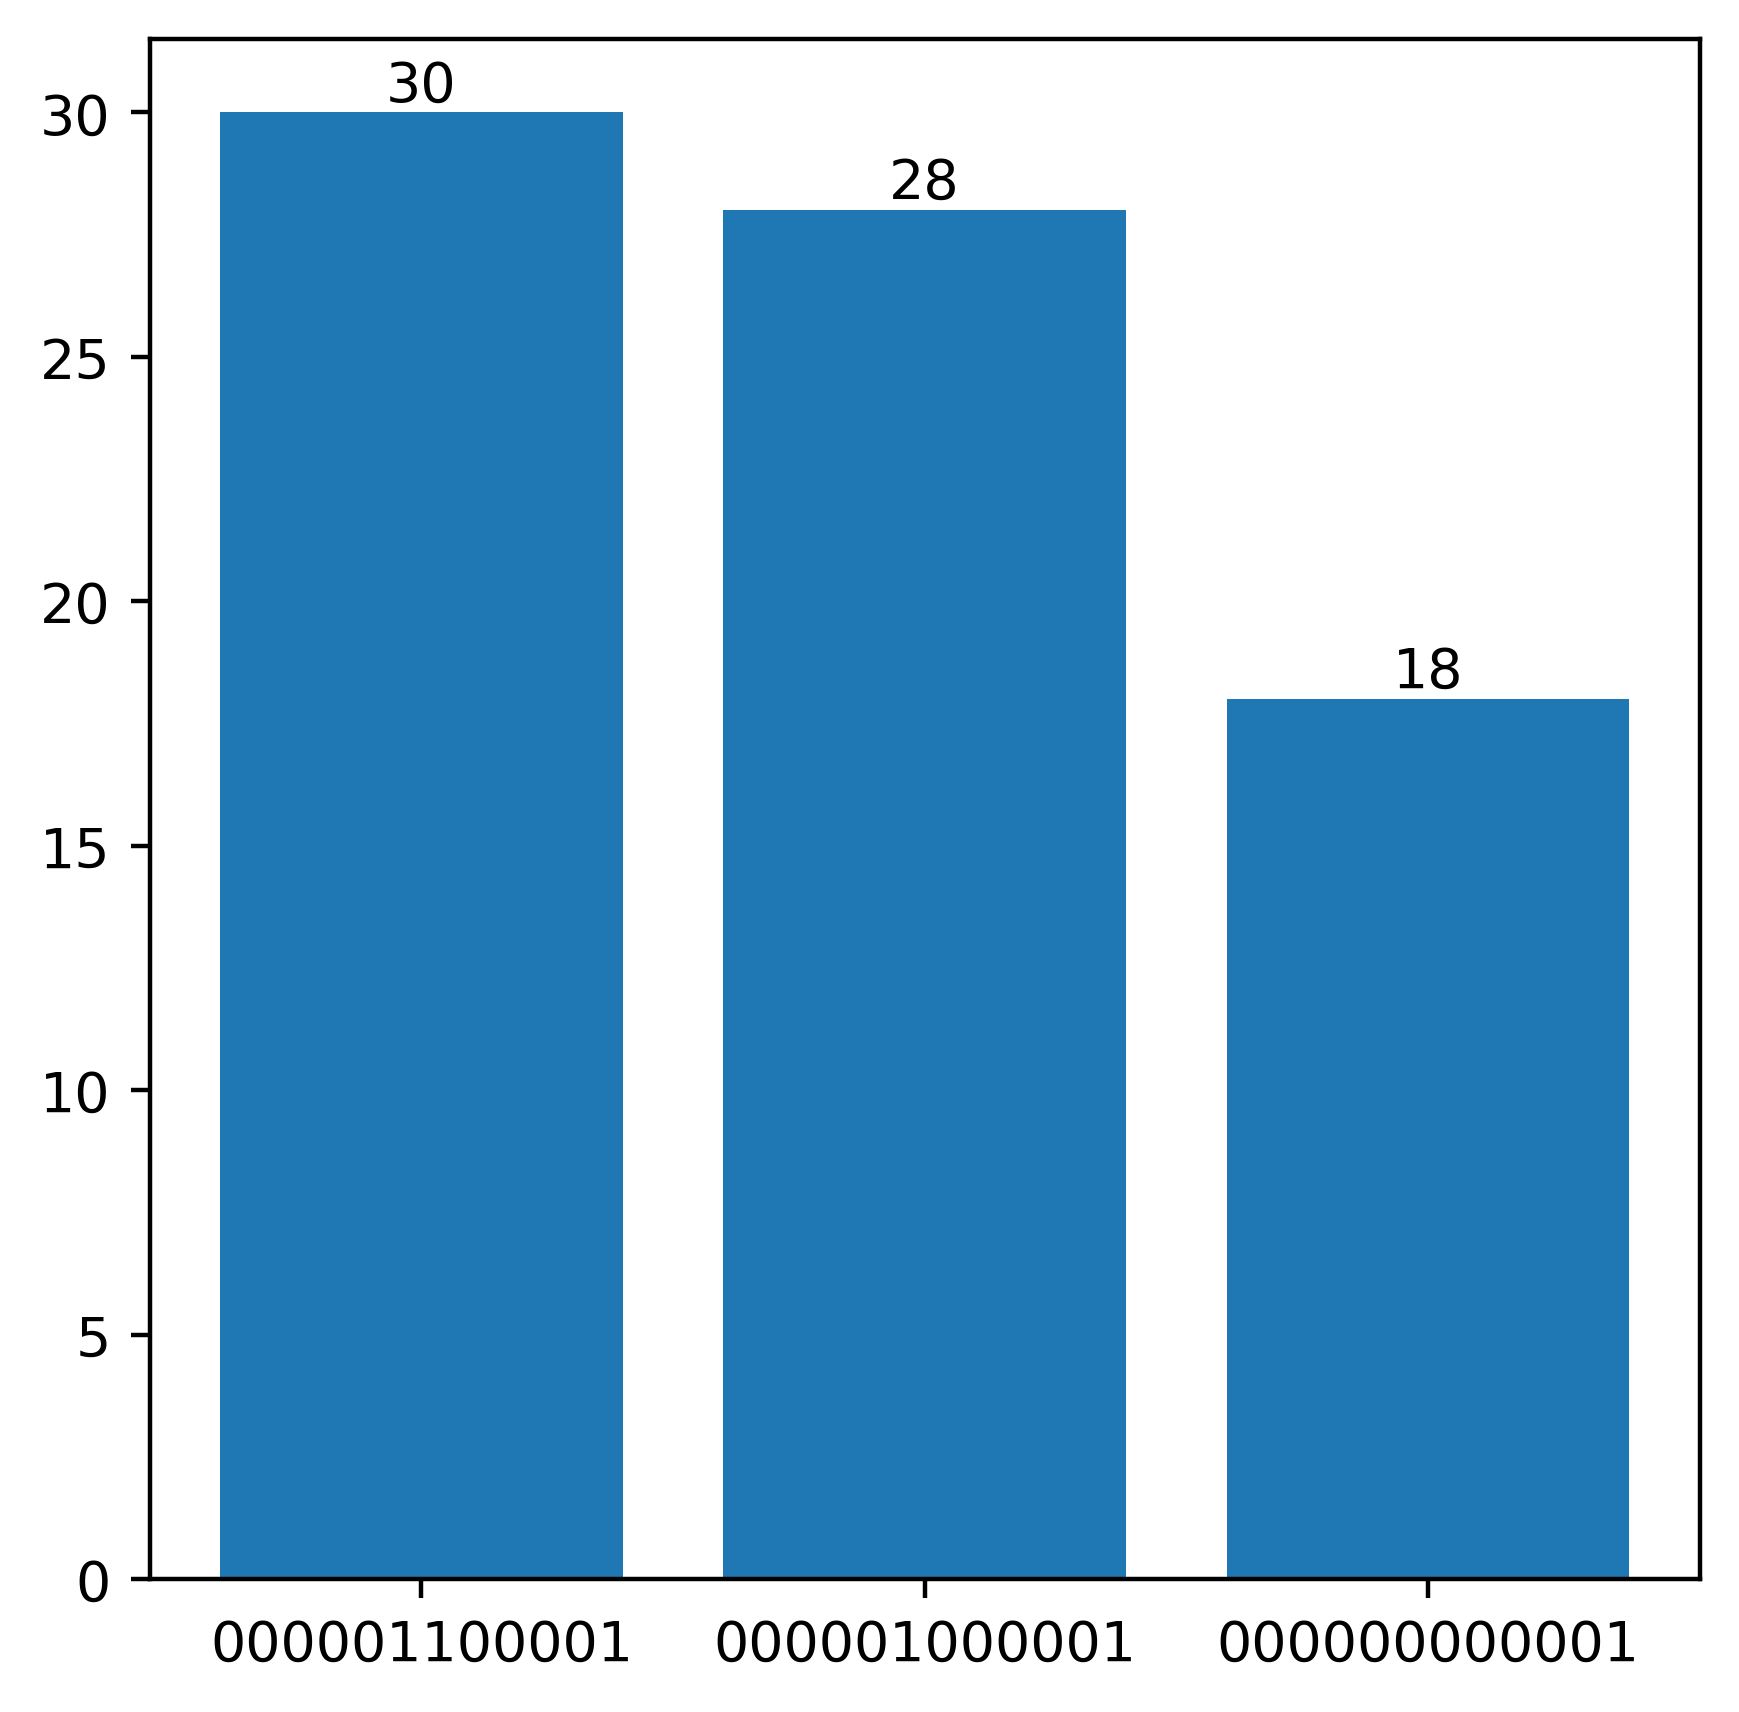

In [26]:
res_dict_12_ng = dict(list(sorted(res_vqe_12_ng.counts.items(), key=lambda item: item[1], reverse=True))[0:3])
print(res_dict_12_ng)
plt.figure(figsize=(5, 5), dpi=400)
little_endian = [s[::-1] for s in res_dict_12_ng.keys()]
counts = plt.bar(range(len(res_dict_12_ng)), list(res_dict_12_ng.values()))
plt.bar_label(counts)
plt.xticks(range(len(res_dict_12_ng)), list(little_endian)) #, rotation=20) #, fontsize=5)
plt.show()